# Email Spam Detection System

## Introduction

Email spam detection is like having a virtual assistant that helps you automatically distinguish between these two types of messages. It looks at various characteristics of the messages, such as the sender's information, the content of the message, and any attached links or files. Based on these characteristics, the spam detection system uses clever algorithms to make a prediction: Is this message likely to be spam or not?

The ultimate goal of spam detection is to protect people from unwanted messages, save time and effort, and ensure that people only receive relevant and important communication. It acts as a filter, keeping your inbox clean and ensuring that you don't fall victim to scams or waste time dealing with irrelevant messages.

#### Dataset link : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## About the data
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

## Loading Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Data Overview

In [2]:
data=pd.read_csv('spam.csv',encoding='cp1252')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

## Data Cleaning

In [5]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##### 
There are a lot of missing values in unnamed 2, 3 & 4
so the best practice is to removes these values.

In [7]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [8]:
data.rename(columns={'v1':'Label','v2':'Text'},inplace=True)

In [9]:
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.groupby("Label").count()

,Text
Label,
ham,4825
spam,747


## Dealing with duplicate values

In [11]:
data.duplicated().sum()

403

In [12]:
data = data.drop_duplicates(keep="first")

In [13]:
data.shape

(5169, 2)

## Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
data['Label'] = encoder.fit_transform(data['Label'])
data.head()

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA

<Axes: xlabel='Label'>

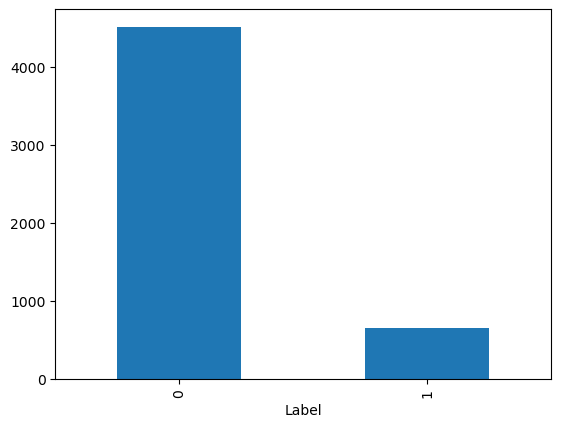

In [16]:
data['Label'].value_counts().plot(kind='bar')

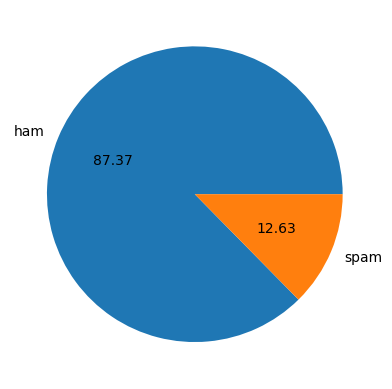

In [17]:
import matplotlib.pyplot as plt
plt.pie(data['Label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

## Feature Engineering: Adding Text-related Columns for Character, Word, and Sentence Counts¶
Now, lets add three new columns :

1. num_characters : which counts how many characters are there in each text row

2. num_words : which counts how many words are there in each text row

3. num_sentences: which counts how many sentence are there in each text row

In [18]:
import nltk

In [19]:
# num of characters
data['num_characters'] = data['Text'].apply(len)
# num of words
data['num_words'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
# num of sentences
data['num_sentences'] = data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
data.head()

,Label,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


##### Lets understand the range and variability of character counts, word counts, and sentence counts in the text data.

In [21]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


##### 
num_characters: The average (mean) number of characters in the text messages is approximately 79. The standard deviation of 58 suggests a relatively wide variation in the character counts. The minimum character count is 2, while the maximum is 910. The 25th percentile indicates that 25% of the messages have 36 or fewer characters, and the 75th percentile shows that 75% of the messages have 117 or fewer characters.

num_words: On average, the text messages contain around 18 words. The standard deviation is approximately 13, indicating some variability in word counts. The minimum number of words is 1, and the maximum is 219. The 25th percentile suggests that 25% of the messages have 9 or fewer words, while the 75th percentile indicates that 75% of the messages have 26 or fewer words.

num_sentences: The average number of sentences in the text messages is approximately 2. The standard deviation of 1.4 indicates a moderate variation in the sentence counts. The minimum and maximum values are 1 and 38, respectively. The 25th percentile suggests that 25% of the messages have 1 sentence, while the 75th percentile indicates that 75% of the messages have 2 or fewer sentences.

##### Lets understand the range and variability of character counts, word counts, and sentence counts of ham and spam in the text data.

In [22]:
# ham
data[data['Label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# spam
data[data['Label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


##### Comparing the statistics for the columns 'num_characters', 'num_words', and 'num_sentences' from the different datasets (ham vs. spam), the following observations can be made:

num_characters:
* The average character count in the spam dataset (138) is significantly higher compared to the ham dataset (79).
* The standard deviation for character counts in the spam dataset (30.1) is lower than that in the ham dataset (56.4), indicating less variability in character counts for spam messages.
* The range of character counts in the spam dataset (13 to 224) is narrower compared to the ham dataset (2 to 910).

num_words:
* The average word count in the spam dataset (27.5) is higher compared to the ham dataset (18.3).
* The standard deviation for word counts in the spam dataset (6.9) is lower than that in the ham dataset (13.2), indicating less variability in word counts for spam messages.
* The range of word counts in the spam dataset (2 to 44) is narrower compared to the ham dataset (1 to 219).

num_sentences:
* The average number of sentences in the spam dataset (2.97) is higher compared to the ham dataset (1.96).
* The standard deviation for sentence counts in the spam dataset (1.49) is slightly higher than that in the ham dataset (1.43), indicating similar variability in sentence counts for both spam and ham messages.
* The range of sentence counts in the spam dataset (1 to 9) is narrower compared to the ham dataset (1 to 38).

spam messages tend to have higher average counts for characters, words, and sentences compared to the ham messages. Additionally, the spam messages generally exhibit lower standard deviations, indicating less variability in the counts. These differences suggest that spam messages are typically longer, contain more words, and have slightly more sentences compared to ham messages

#### Lets visualize

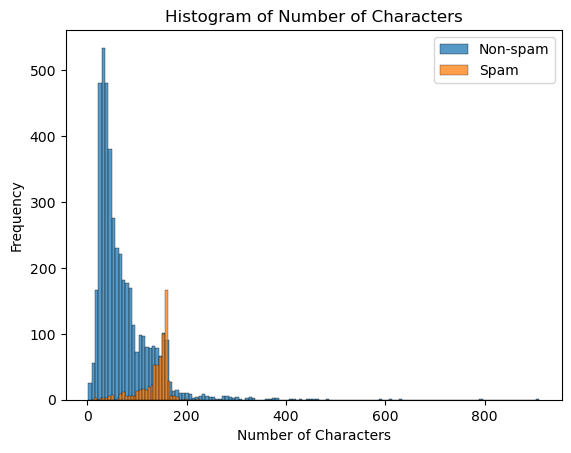

In [24]:
# num_characters
import seaborn as sns
sns.histplot(data[data['Label'] == 0]['num_characters'], label='Non-spam')
sns.histplot(data[data['Label'] == 1]['num_characters'], label='Spam')

plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Characters')
plt.legend()
plt.show()

######
As we can see,we have higher average counts for characters in spam as compared to ham.

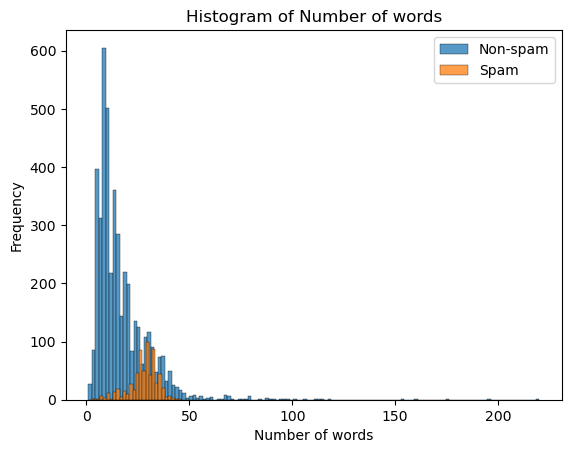

In [25]:
#num_words
sns.histplot(data[data['Label'] == 0]['num_words'], label='Non-spam')
sns.histplot(data[data['Label'] == 1]['num_words'], label='Spam')

plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of words')
plt.legend()
plt.show()

##### 
we have higher average counts for words in spam as compared to ham

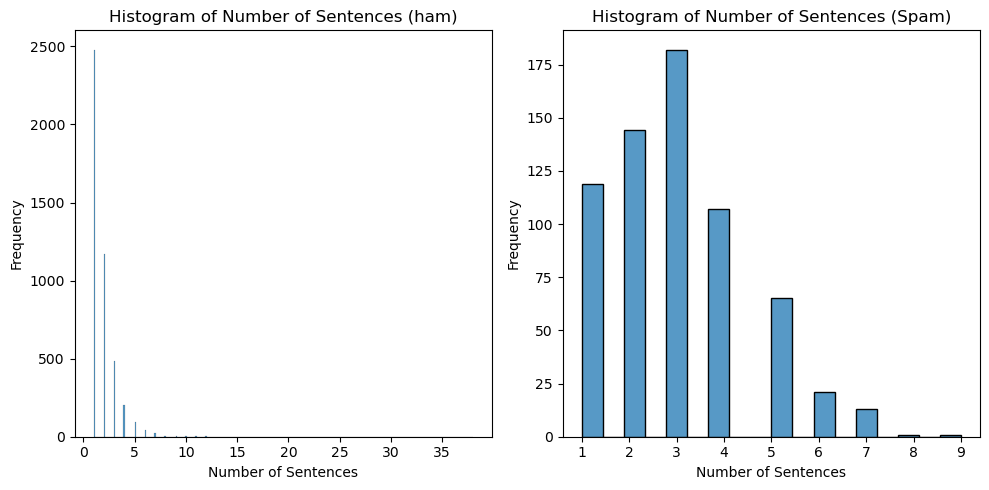

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for non-spam messages
sns.histplot(data[data['Label'] == 0]['num_sentences'], ax=axes[0])
axes[0].set_xlabel('Number of Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Number of Sentences (ham)')

# Plot for spam messages
sns.histplot(data[data['Label'] == 1]['num_sentences'], ax=axes[1])
axes[1].set_xlabel('Number of Sentences')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Number of Sentences (Spam)')

plt.tight_layout()
plt.show()

##### Correlation

In [27]:
data

,Label,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [28]:
df=data.drop("Text",axis=1)

In [29]:
df.corr()

,Label,num_characters,num_words,num_sentences
Label,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

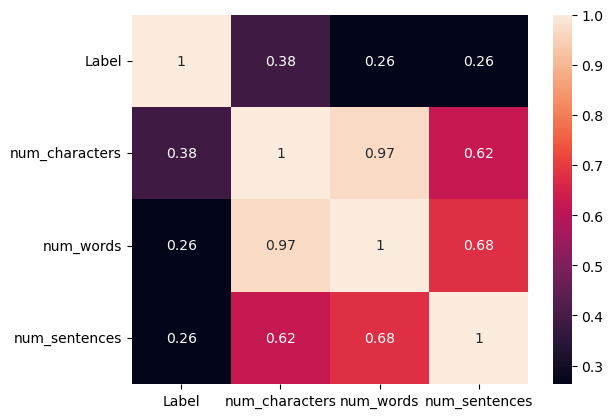

In [30]:
#visualize correlation
sns.heatmap(df.corr(),annot=True)

##### Observation

1. Correlation between 'target' and other variables:

* 'target' has a positive correlation of 0.38 with 'num_characters', which means that as the number of characters in a message increases, the likelihood of the message being classified as spam also increases, to some extent.

* Similarly, 'target' has a positive correlation of 0.26 with 'num_words' and 0.27 with 'num_sentences'. This suggests that as the number of words or sentences in a message increases, the probability of the message being classified as spam also increases, but not as strongly as the correlation with 'num_characters'.

2. Correlation between the numerical variables:

* 'num_characters' and 'num_words' have a strong positive correlation of 0.97, indicating that as the number of characters in a message increases, the number of words also tends to increase. This makes sense because longer messages typically contain more words.

* 'num_characters' and 'num_sentences' have a moderate positive correlation of 0.63. This suggests that as the number of characters in a message increases, the number of sentences tends to increase, but the relationship is not as strong as the correlation between 'num_characters' and 'num_words'.

* 'num_words' and 'num_sentences' also have a moderate positive correlation of 0.68, indicating that as the number of words in a message increases, the number of sentences tends to increase, but again, the relationship is not as strong as the correlation between 'num_characters' and 'num_words'.

Overall, this correlation matrix provides insights into the relationships between the variables in the ham/spam classifier. It suggests that the length of the message, measured in terms of characters, words, and sentences, is somewhat correlated with the likelihood of the message being classified as spam. Additionally, there are correlations between the different length measures themselves, indicating some degree of interdependence between them.

## Text Pre-processing

##### Below are the steps we are taking to pre-process our text

* Lowercasing: Lowercasing involves converting all the text to lowercase letters. This step is necessary to ensure uniformity in the text data. For example, "Hello" and "hello" should be treated as the same word.

* Tokenization: Tokenization is the process of breaking down the text into individual words or tokens. It helps in splitting the text into meaningful units. For example, the sentence "I love dogs" would be tokenized into three separate tokens: "I," "love," and "dogs."

* Removing Special Characters: Special characters such as punctuation marks, symbols, or any non-alphanumeric characters are often removed from the text. This step is performed to eliminate noise and focus on the essential textual content.

* Removing Stop Words and Punctuation: Stop words are common words like "the," "is," or "and" that do not carry significant meaning in the context of the text analysis. Removing stop words helps in reducing the dimensionality of the data and improving computational efficiency. Additionally, removing punctuation marks helps to further clean the text and remove any unnecessary symbols.

* Stemming: Stemming is the process of reducing words to their root or base form. It involves removing suffixes and transformations to obtain the core meaning of a word. For example, stemming would convert words like "running," "runs," and "ran" to their common base form, "run." This step helps in standardizing the words and reducing the vocabulary size.

In [31]:
data.head()

,Label,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text.clear()
    text = []
    for i in y:
        text.append(ps.stem(i))
    return text

In [36]:
data['transformed_text'] = data['Text'].apply(transform_text)

In [37]:
data.head()

,Label,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


##### 
Above code adds a new column called 'transformed_text' to the dataframe and applies the 'transform_text' function to each element in the 'text' column. The 'transform_text' function is responsible for transforming the text by converting it to lowercase, tokenizing it into individual words, removing non-alphanumeric characters, filtering out stop words and punctuation, performing stemming, and joining the filtered words back into a transformed text.
By using the 'apply' method, the 'transform_text' function is applied to each element of the 'text' column, and the resulting transformed text is stored in the 'transformed_text' column.

### Word Cloud

In [38]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [40]:
data['transformed_text'] = data['transformed_text'].astype(str)
spam_wc = wc.generate(data[data['Label'] == 1]['transformed_text'].str.cat(sep=" "))

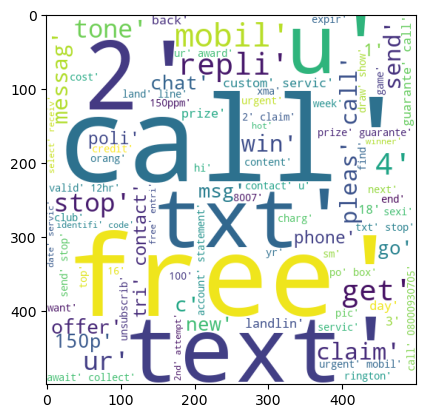

In [41]:
plt.imshow(spam_wc)

In [42]:
ham_wc = wc.generate(data[data['Label'] == 0]['transformed_text'].str.cat(sep=" "))

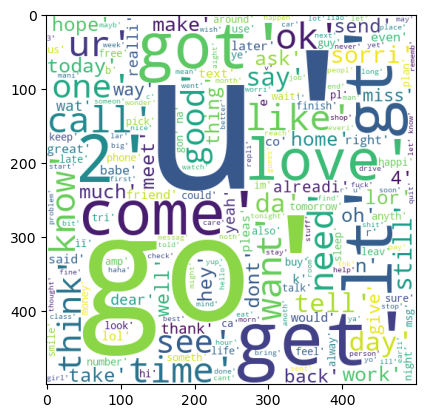

In [43]:
plt.imshow(ham_wc)

##### Lets find top 25 words from both ham and spam text

In [44]:
spam_corpus = []
for msg in data[data['Label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
ham_corpus = []
for msg in data[data['Label']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

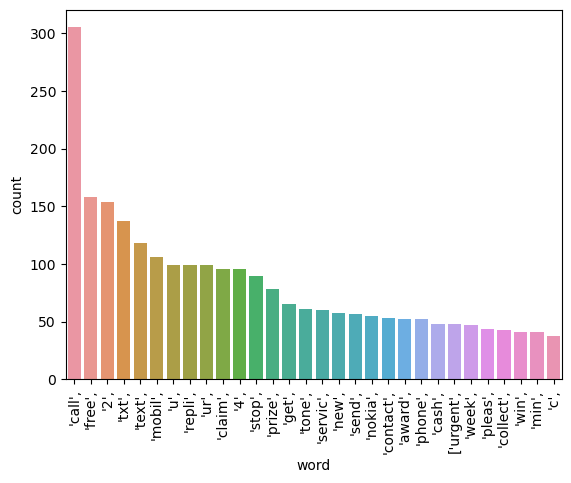

In [46]:
from collections import Counter

spam_corpus = data[data['Label'] == 1]['transformed_text'].str.cat(sep=" ").split()
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation="vertical")
plt.show()

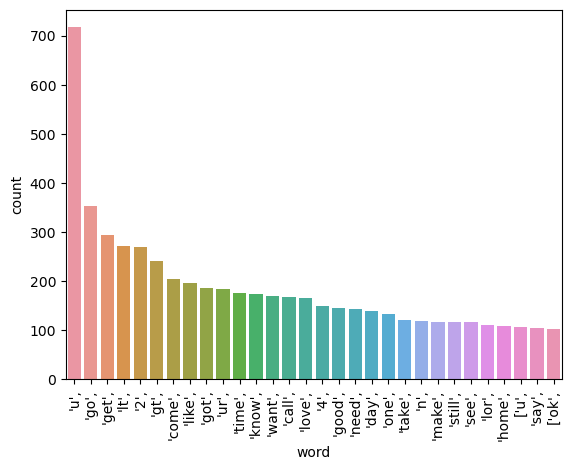

In [47]:
ham_corpus = data[data['Label'] == 0]['transformed_text'].str.cat(sep=" ").split()
most_common_words_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words_ham)
plt.xticks(rotation="vertical")
plt.show()

## Model Building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [49]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [50]:
X.shape

(5169, 6708)

In [51]:
y = data['Label'].values

In [52]:
y.shape

(5169,)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [54]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [59]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239


In [60]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.935203,0.838095
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GBDT,0.952611,0.923810


In [61]:
performance_df = performance_df.sort_values('Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
3,DT,0.935203,0.838095


## Conclusion

##### 
Based on the results the Random Forest (RF) algorithm has the highest accuracy and precision scores among all the algorithms evaluated for detecting whether a message is spam or not.

**Accuracy** : RF achieved an accuracy of 0.97, which means it correctly classified approximately 97.19% of the messages as either spam or not spam. This high accuracy suggests that NB is effective in distinguishing between spam and non-spam messages.

**Precision** : RF obtained a precision score of 1.000, indicating that when it predicted a message as spam, it was correct 100% of the time. In other words, NB has a very low false positive rate, meaning it rarely misclassifies non-spam messages as spam.

Considering these results, NB stands out as a strong choice for spam detection. It offers a high overall accuracy and an impressive precision score, ensuring that when it predicts a message as spam, it is highly likely to be correct.